### Import the necessary Libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats

### Load the dataset

In [118]:
# load the actual dataset
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

In [119]:
# load the dataset description
description = pd.read_excel("http://bit.ly/DSCoreAutolibDatasetGlossary")

### Explore the dataset

In [120]:
# preview the top of the dataset

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [121]:
# preview the bottom of the dataset

df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [122]:
# preview random sample of the dataset

df.sample(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3487,78000,3/1/2018,1389,3,weekday,36,39,0,0,0,0,0,0
3068,75020,4/18/2018,1377,2,weekday,348,348,9,8,32,39,106,109
9532,92600,2/3/2018,1438,5,weekend,270,255,1,1,14,12,0,0
11944,93370,6/11/2018,1440,0,weekday,1,1,0,0,0,0,0,0
10841,93200,5/24/2018,1436,3,weekday,39,45,4,4,0,0,0,0


In [123]:
# view the description of the dataset

description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


     From the description above, we can understand what each column means

     For example, in dayOfWeek column, 0 refers to Monday, 1 refers Tuesday,...

In [124]:
# list of columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [125]:
# size od the datset

print(df.shape[0], 'rows and', df.shape[1], 'columns')

16085 rows and 13 columns


In [126]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


             From the above, we can know the data type of each column

             We can also conclude that there are no missing values

### Data Cleaning

##### Validity

In [127]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [128]:
# renaming the days of the week to sensible names
df['dayOfWeek'] = df['dayOfWeek'].replace([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])


##### Completeness

In [129]:
# check for missing values

df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

             There are no missing values

##### Consistency

In [130]:
# check for duplicates

df.duplicated().sum()

0

             There are no duplicate values

##### Uniformity

In [131]:
# column names to lower case

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [132]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [133]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [134]:
# remove whitespaces

# df['postal code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
#        'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
#        'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
#        'slots_freed_sum', 'slots_taken_sum'].str.strip()

##### Outliers

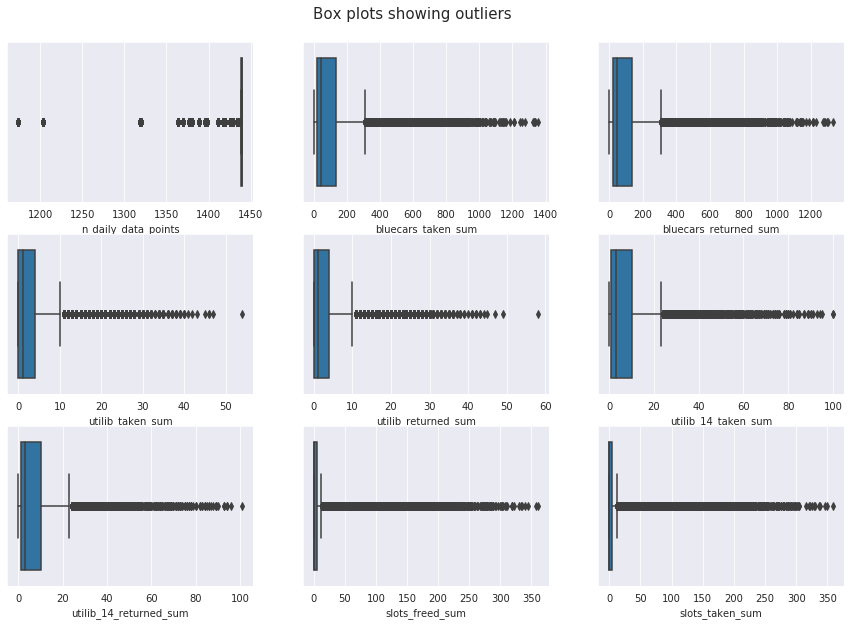

In [135]:
# detect outliers
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, ['n_daily_data_points',	'bluecars_taken_sum',\
    	'bluecars_returned_sum',	'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', \
            'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum']):
  sns.boxplot(df[name], ax = ax)

##### Handling the outliers

In [136]:
# drop outliers on n_daily_data_points column

Q1 = df['n_daily_data_points'].quantile(0.25)
Q3 = df['n_daily_data_points'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['n_daily_data_points']= np.where(df['n_daily_data_points'] >upper,upper,np.where(df['n_daily_data_points'] <lower,lower,df['n_daily_data_points']))


In [137]:
# drop outliers on utilib_returned_sum column

Q1 = df['utilib_returned_sum'].quantile(0.25)
Q3 = df['utilib_returned_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['utilib_returned_sum']= np.where(df['utilib_returned_sum'] >upper,upper,\
    np.where(df['utilib_returned_sum'] <lower,lower,df['utilib_returned_sum']))


In [138]:
# drop outliers on utilib_taken_sum column

Q1 = df['utilib_taken_sum'].quantile(0.25)
Q3 = df['utilib_taken_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['utilib_taken_sum']= np.where(df['utilib_taken_sum'] >upper,upper,\
    np.where(df['utilib_taken_sum'] <lower,lower,df['utilib_taken_sum']))


In [139]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [140]:
# drop outliers on utilib_taken_sum column

Q1 = df['bluecars_taken_sum'].quantile(0.25)
Q3 = df['bluecars_taken_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['bluecars_taken_sum']= np.where(df['bluecars_taken_sum'] >upper,upper,\
    np.where(df['bluecars_taken_sum'] <lower,lower,df['bluecars_taken_sum']))

In [141]:
# drop outliers on utilib_taken_sum column

Q1 = df['bluecars_returned_sum'].quantile(0.25)
Q3 = df['bluecars_returned_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['bluecars_returned_sum']= np.where(df['bluecars_returned_sum'] >upper,upper,\
    np.where(df['bluecars_returned_sum'] <lower,lower,df['bluecars_returned_sum']))

In [142]:
# drop outliers on utilib_taken_sum column

Q1 = df['utilib_14_taken_sum'].quantile(0.25)
Q3 = df['utilib_14_taken_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['utilib_14_taken_sum']= np.where(df['utilib_14_taken_sum'] >upper,upper,\
    np.where(df['utilib_14_taken_sum'] <lower,lower,df['utilib_14_taken_sum']))

In [143]:
# drop outliers on utilib_taken_sum column

Q1 = df['utilib_14_returned_sum'].quantile(0.25)
Q3 = df['utilib_14_returned_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['utilib_14_returned_sum']= np.where(df['utilib_14_returned_sum'] >upper,upper,\
    np.where(df['utilib_14_returned_sum'] <lower,lower,df['utilib_14_returned_sum']))

In [144]:
# drop outliers on utilib_taken_sum column

Q1 = df['utilib_14_returned_sum'].quantile(0.25)
Q3 = df['utilib_14_returned_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['utilib_14_returned_sum']= np.where(df['utilib_14_returned_sum'] >upper,upper,\
    np.where(df['utilib_14_returned_sum'] <lower,lower,df['utilib_14_returned_sum']))

In [145]:
# drop outliers on utilib_taken_sum column

Q1 = df['slots_freed_sum'].quantile(0.25)
Q3 = df['slots_freed_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['slots_freed_sum']= np.where(df['slots_freed_sum'] >upper,upper,\
    np.where(df['slots_freed_sum'] <lower,lower,df['slots_freed_sum']))

In [146]:
# drop outliers on utilib_taken_sum column

Q1 = df['slots_taken_sum'].quantile(0.25)
Q3 = df['slots_taken_sum'].quantile(0.75)

IQR = Q3 - Q1
whisker=1.5
lower=Q1-(whisker*IQR)
upper=Q3+(whisker*IQR)
df['slots_taken_sum']= np.where(df['slots_taken_sum'] >upper,upper,\
    np.where(df['slots_taken_sum'] <lower,lower,df['slots_taken_sum']))

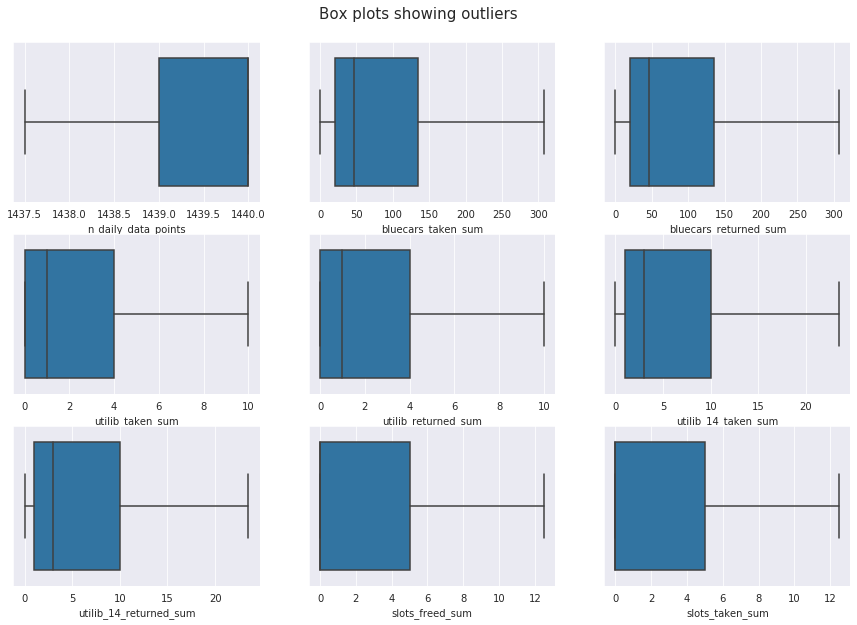

In [147]:
# detect outliers
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, ['n_daily_data_points',	'bluecars_taken_sum',\
    	'bluecars_returned_sum',	'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', \
            'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum']):
  sns.boxplot(df[name], ax = ax)

            Outliers removed

#### statistical summaries



In [148]:
# Train statistical summary
df.describe(include = 'all')

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085,16085.000000,16085,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-06-12 00:00:00,NaN,Mon,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,2374,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1439.334784,NaN,NaN,95.663879,95.618682,2.855020,2.852906,6.832173,6.831707,3.155207,3.150886
std,7647.342000,NaN,0.967023,NaN,NaN,104.791259,104.647809,3.425495,3.420646,7.830625,7.830755,5.024086,5.021926
min,75001.000000,NaN,1437.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,NaN,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


### Exploratory data analysis

##### Univarriate

In [149]:
def univariate(data, column):
    sns.distplot(data[column])

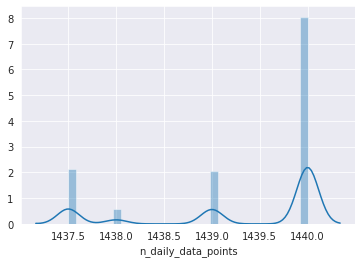

In [150]:
univariate(df, 'n_daily_data_points')

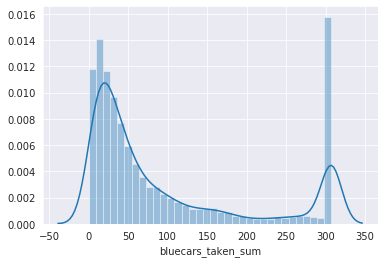

In [151]:
univariate(df, 'bluecars_taken_sum')

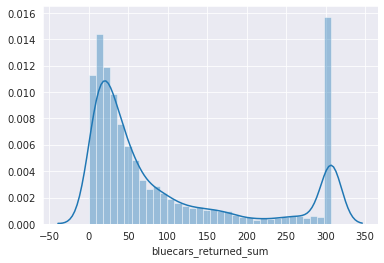

In [152]:
univariate(df, 'bluecars_returned_sum')

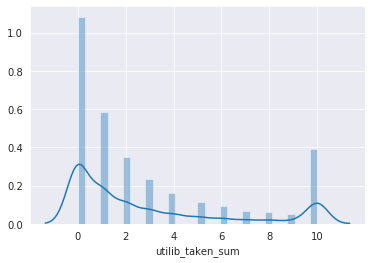

In [153]:
univariate(df, 'utilib_taken_sum')

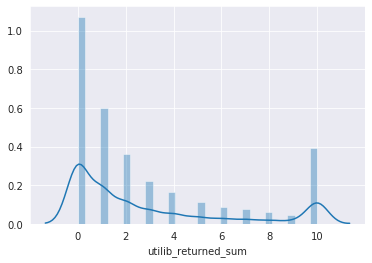

In [154]:
univariate(df, 'utilib_returned_sum')

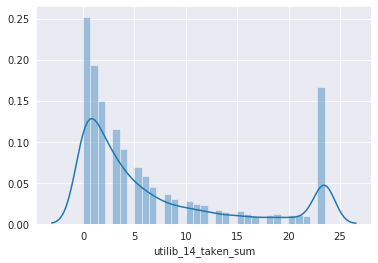

In [155]:
univariate(df, 'utilib_14_taken_sum')

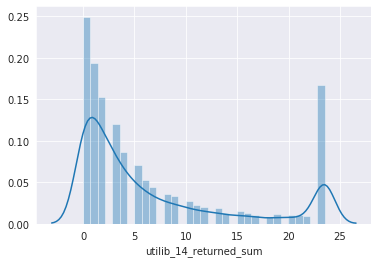

In [156]:
univariate(df, 'utilib_14_returned_sum')

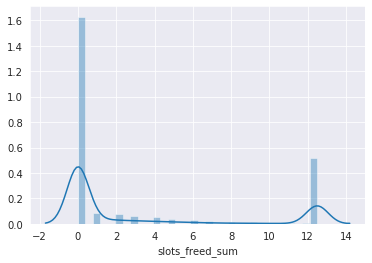

In [157]:
univariate(df, 'slots_freed_sum')

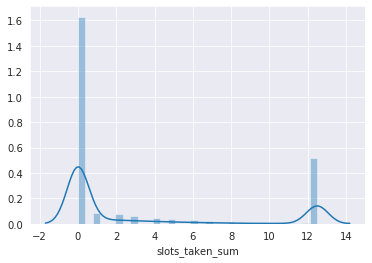

In [158]:

univariate(df, 'slots_taken_sum')

In [159]:
columns = ['postal code', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']

In [160]:
# # Density plots
# sns.set(font_scale=1.3)
# fig, axes = plt.subplots(7, 2, figsize=(18, 14))
# axes = [ax for axes_row in axes for ax in axes_row]
# for i, c in enumerate(columns):
#   plot = sns.kdeplot(data=df, x=c, ax=axes[i], fill=True)
# plt.tight_layout()

Text(0.5, 0, 'Days of the week')

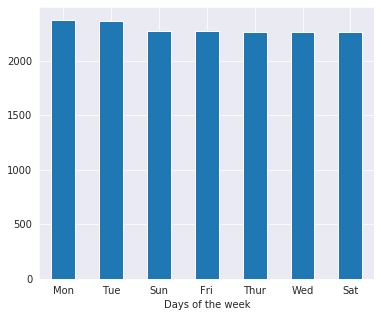

In [161]:
# compare weekdays and weekends
plt.figure(figsize=(6, 5))
df['dayofweek'].value_counts().plot(kind = 'bar', rot= 0)
plt.xlabel('Days of the week')

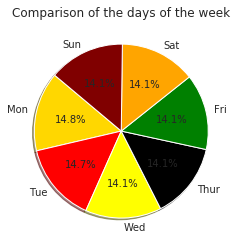

In [162]:

# pie chart for days of the week 
x = df['dayofweek'].value_counts()
labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
colors = ['gold', 'red', 'yellow', 'black', 'green', 'orange', 'maroon']
explode = [0, 0, 0, 0, 0, 0, 0]
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of the days of the week')
plt.show()

    There is minimal difference in the different days of the week

    However, monday is the highest, followed by tueday and a tie between the rest of the days

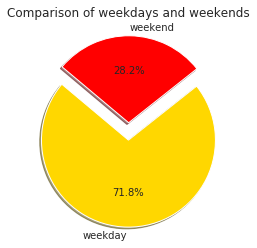

In [163]:

df['day_type'].unique()
x = df['day_type'].value_counts()
labels = ['weekday', 'weekend']
colors = ['gold', 'red']
explode = [0.1, 0.1]
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of weekdays and weekends')
plt.show()

        Most services happen during the weekdays

##### Bivarriate

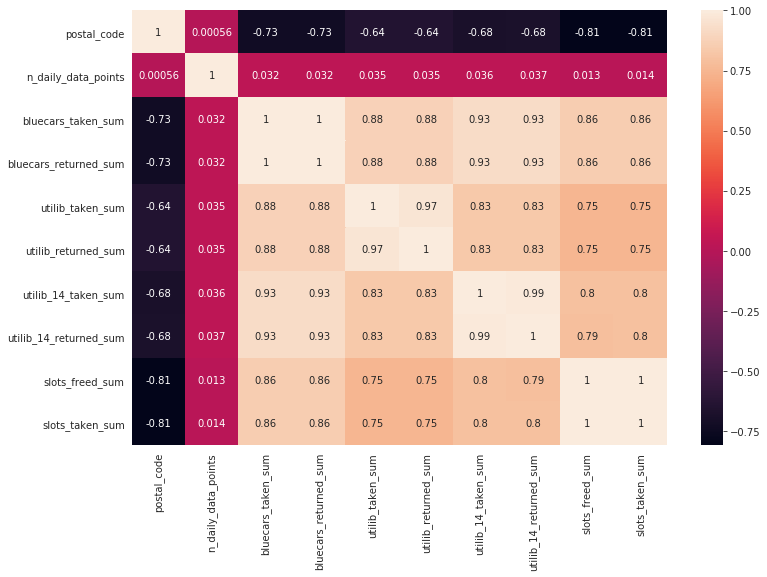

In [164]:
# correlatio
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True)

There is a strong positive correlation between each type of car taken and returned.

For example, utilib 14 taken sum vs utilib 14 returned sum

<Figure size 1008x1008 with 0 Axes>

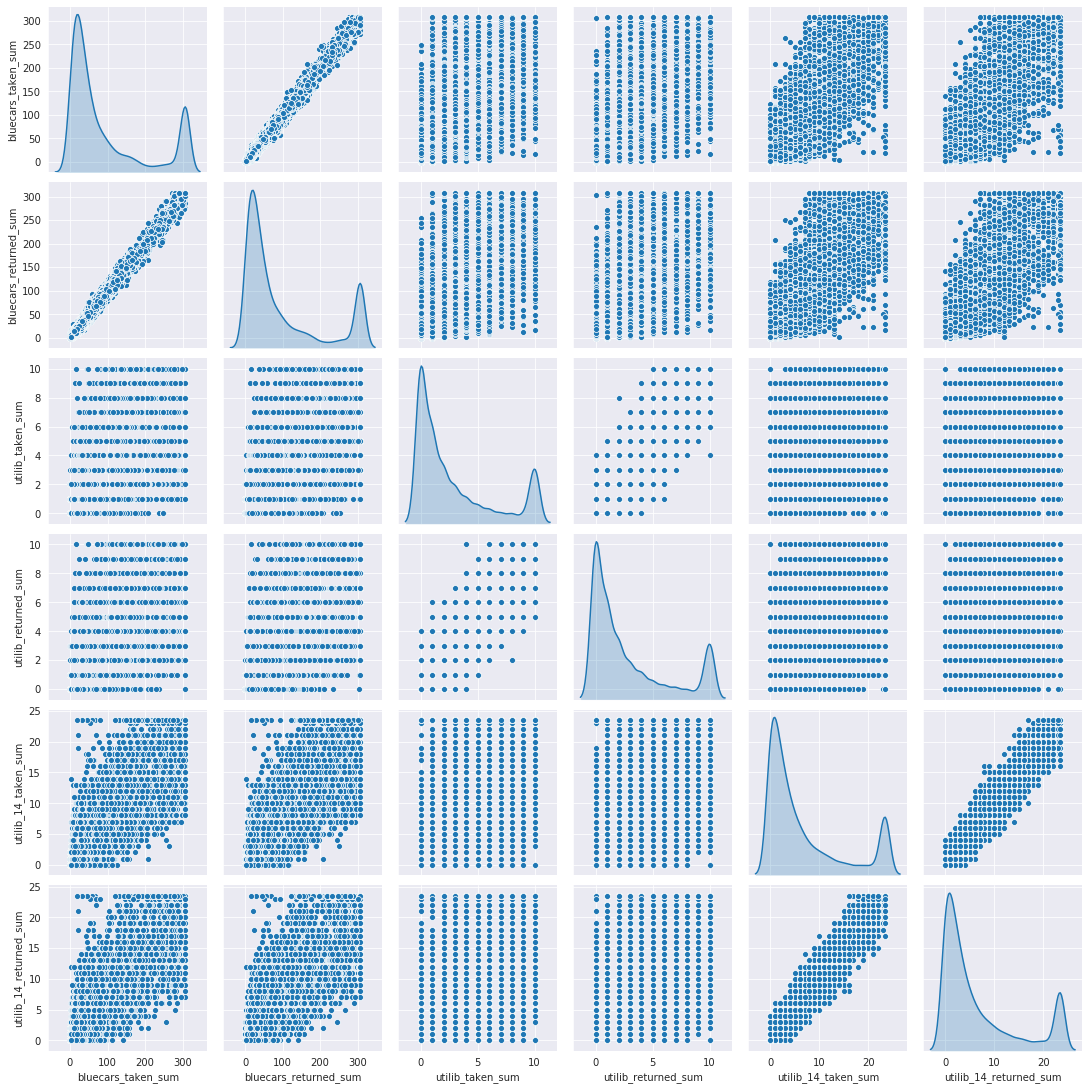

In [165]:
# crossplots
plt.figure(figsize=(14, 14))
df2 = df[['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',\
    'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum']]
sns.pairplot(df2, diag_kind='kde')

In [174]:
x = df[(df['postal_code'] == 75015) & (df['day_type'] == 'weekday')]
x['bluecars_taken_sum'].unique()

array([307.5,  49. ])

### Hypothesis Testing

##### 1. Specifying the null and alternative testing

<i>Null hypothesis:</i> The number of blue cars taken from postal codes 75015 and 75017 is equal

H0: mean1 = mean2

<i>Alternative hypothesis:</i>The number of blue cars taken from postal codes 75015 and 75017 is not equal

Ha: mean1 != mean2

##### 2. Set the significance level

5%, i.e 0.05

##### 3. Calculate the test statistic and the corresponding p value

using z-score, because the standard deviation is know(will be calculated)

### Sampling Technique

Simple  random sampling technique will be used

Simple random sampling is free from bias, i.e every individual has an equal chance of being picked

Choose a sample of 1000 from each of the postal codes(75015 and 75017)

In [178]:
# dataframe with postal code 75015 and during weekdays
postal_code1_used = df[(df['postal_code'] == 75015) & (df['day_type'] == 'weekday')]
postal_code1_used.shape

(112, 13)

In [179]:
# dataframe with postal code 75017 and weekdays 
postal_code2_used = df[(df['postal_code'] == 75017) & (df['day_type'] == 'weekday')]
postal_code2_used.shape

(112, 13)

In [180]:
# concatenate the population

pop_frame = [postal_code1_used, postal_code2_used]

population = pd.concat(pop_frame)

#population mean
print('population mean =', population['bluecars_taken_sum'].mean())

#population standard deviation
print('population standard deviation =', population['bluecars_taken_sum'].std())

population mean = 305.14285714285717
population standard deviation = 24.895109877966043


A good maximum sample size is usually around 10% of the population

Most statisticians agree that the minimum sample size to get any kind of meaningful result is 100. 

If your population is less than 100 then you really need to survey all of them.

For my population, there is 112 postal codes both in postal 75015 and 75017 and operates during weekdays, making a total of 224

Will use 10% from each as a sample

In [181]:
# create a sample size
# 10% of the population
sample_size = round(0.1 * 112)
print('sample size of each postal code is', sample_size)

print('Total sample size will be', sample_size*2)

sample size of each postal code is 11
Total sample size will be 22


In [200]:
# choosing the sample

postal_code1 = postal_code1_used.sample(11)
postal_code2 = postal_code2_used.sample(11)

# create a dataframe with the samples
frames = [postal_code1, postal_code2]
sample_df = pd.concat(frames)

In [194]:
# statistic summaries of the samples
sample_df.describe()

,postal_code,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,75016.000000,1439.181818,295.750000,295.886364,9.636364,9.590909,22.522727,22.704545,12.250000,12.295455
std,1.023533,1.029857,55.112385,54.472783,1.497473,1.918806,4.583815,3.731013,1.172604,0.959403
min,75015.000000,1437.500000,49.000000,52.000000,3.000000,1.000000,2.000000,6.000000,7.000000,8.000000
25%,75015.000000,1438.250000,307.500000,307.500000,10.000000,10.000000,23.500000,23.500000,12.500000,12.500000
50%,75016.000000,1440.000000,307.500000,307.500000,10.000000,10.000000,23.500000,23.500000,12.500000,12.500000
75%,75017.000000,1440.000000,307.500000,307.500000,10.000000,10.000000,23.500000,23.500000,12.500000,12.500000
max,75017.000000,1440.000000,307.500000,307.500000,10.000000,10.000000,23.500000,23.500000,12.500000,12.500000


In [195]:
# sample mean
print('sample mean =',sample_df['bluecars_taken_sum'].mean())

# sample standard deviation
print('sample standard deviation=',sample_df['bluecars_taken_sum'].std())

sample mean = 295.75
sample standard deviation= 55.1123851779253


##### From the statistic calculations:

population mean = 305.14285714285717

population standard deviation = 24.895109877966043

sample mean = 295.75

sample standard deviation= 55.1123851779253


#### Finding the z score and the p value

In [197]:
# z score

pop_mean = 305.14285714285717
sample_mean = 295.75
std_dev = 24.895109877966043
alpha = 0.05

zscore= (sample_mean - pop_mean) / (std_dev)
print('zscore =',zscore)

zscore = -0.3772972760072258


In [199]:
# finding the p-value
# it is a two tailed test

print('P-value = ',scipy.stats.norm.sf(abs(zscore))*2)

P-value =  0.7059526962957161


#### Discussion and conclusion

If p value <= significance level, reject the null hypothesis

For the tests above, P-value =  0.7059526962957161 and significance level was set to 0.05

Therefore, p-value > significance level

0.7059526962957161 > 0.05

        Conclusion
We fail to reject the null hypothesis, since there is no enough evidence to reject the null hypothesis